# A Primer on RTT Localization CRBs

With reference to standard TDOAs, one may choose to localize via return trip timings (RTTs). This is **not** the same as ranging (at least not exactly) as is used in standard GPS systems, but instead involves at least a single 'bounce'. Here we will derive the CRB for this specific single bounce scenario, although multiple bounces should be easily extended from this example.

## Measurement of Range

In the single bounce scenario, the signal travels from the emitter (here denoted as $E$) and reaches the unknown *reflector* (here denoted as $X$), then to the receiver/sensor (here denoted as $S$). As such the ranging measurement (after conversions from RTT) is as follows:

$$
r = |X - S| + |X - E|
$$

where the above variables are all vectors representing the respective positions. Here we have not assumed that the emitter is the same as the receiver/sensor.

Note that the form of this is very similar to the TDOA range measurement:

$$
r = |X - S_2| - |X - S_1|
$$

where the two $s_i$ represent the pair of sensors/receivers. Hence it is likely that the final form can be worked out in almost identical way.



## Differentials of Range

In order to calculate the CRB, we need to differentiate the range with respect to the spatial dimensions. 

It is easier to see how to perform the differentiation if the explicit components are written out:

\begin{align}
r &= \left( (x-S_x)^2 + (y-S_y)^2 + (z-S_z)^2 \right)^{1/2} + \left( (x-E_x)^2 + (y-E_y)^2 + (z-E_z)^2 \right)^{1/2} \\
&= \mu + \nu
\end{align}

Differentiating each part $\mu$ and $\nu$, we obtain

$$
\frac{\partial \mu}{\partial x_i} = \frac{X_i - S_i}{\mu}
$$

$$
\frac{\partial \nu}{\partial x_i} = \frac{X_i - E_i}{\nu}
$$

where $i \in \{0,1,2\}$, corresponding to the $x,y,z$ components.

Then

\begin{align}
\frac{\partial r}{\partial x_i} &= \frac{\partial \mu}{\partial x_i} + \frac{\partial \nu}{\partial x_i} \\
&= \frac{X_i - S_i}{\mu} + \frac{X_i - E_i}{\nu}
\end{align}

Note that the convention of $|X-S|$ or $|S-X|$ does not matter; the reader is welcome to confirm this.

At this point, the CRB derivation follows the TDOA one, with each of these terms adding to our 'measurement list'. Explicitly, we define the matrix

\begin{equation}
R = \begin{bmatrix}
\frac{X_x - S^{(0)}_x}{\mu^{(0)}} + \frac{X_x - E_x}{\nu} & \frac{X_x - S^{(1)}_x}{\mu^{(1)}} + \frac{X_x - E_x}{\nu} & ...\\
\frac{X_y - S^{(0)}_y}{\mu^{(0)}} + \frac{X_y - E_y}{\nu} & \frac{X_y - S^{(1)}_y}{\mu^{(1)}} + \frac{X_y - E_y}{\nu} & ...\\
\frac{X_z - S^{(0)}_z}{\mu^{(0)}} + \frac{X_z - E_z}{\nu} & \frac{X_z - S^{(1)}_z}{\mu^{(1)}} + \frac{X_z - E_z}{\nu} & ...\\
\end{bmatrix}
\end{equation}

where the superscript represents the *measurement index*, so there for $N$ measurements the matrix R should have $N$ columns. Here we have assumed a stationary emitter, and as such there is no dependence on the measurement index for $E$, but the general form of the equation is evidently unchanged even if the emitter is moving.

Then the Fisher Information Matrix is defined by

\begin{equation}
F = R \sigma R^T
\end{equation}

with $\sigma$ representing the error matrix of the measurements.

## Accounting for Processing Delays

In any scenario other than a simple reflector or re-broadcaster, there is likely to be some form of processing delay between the receipt of the original signal and the transmission to the final receiver. Hence, the actual form of the range measurement would likely be

\begin{equation}
r = |X - S| + |X - E| + \epsilon
\end{equation}

where $\epsilon$ is some constant representing the delay. Note that the form of this equation allows us to assume that it encompasses all forms of constant (non-time-dependent) delays. We may also assume that the processing delay is not exactly constant, but rather normally-distributed around some mean i.e. $\epsilon \rightarrow N(\epsilon, \sigma_\epsilon)$.

We would like to consider the case where the value $\epsilon$ is unknown; any known value should be a statistical error and can be easily removed. Heuristically, it should be possible to at least detect the presence of the unknown $\epsilon$ by taking measurements at different *geometries*. In particular, it should require at least 3 measurements to expose this mismatch in the model.

Let's consider a simple example with our reflector at $(0,0,0)$, and our TX/RX at 4 corners of a square.

Grid search took 0.478662 seconds.


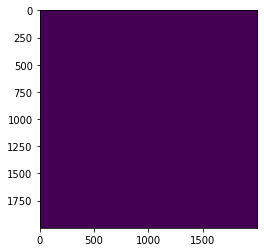

In [2]:
from plotRoutines import *
from localizationRoutines import *
import numpy as np

x = np.array([0,0,0]) # Reflector at centre
t = np.array([-10e3, 10e3, 0]) # Transmitter at top left
r = np.array([[-10e3, -10e3, 0], # Receivers at 3 measurements on other 3 corners
              [10e3, -10e3, 0],
              [10e3, 10e3, 0]])

# Define some errors
toa_sigma_list = np.zeros(r.shape[0]) + 1e-3

# Calculate the measurements
toa_list = np.linalg.norm(r - x, axis=1) + np.linalg.norm(t - x)

# Make a grid
gridside = 20e3
gridx = np.arange(-10e3, -10e3 + gridside, 10)
gridy = np.arange(-10e3, -10e3 + gridside, 10)
meshx, meshy = np.meshgrid(gridx, gridy)
grid_list = np.vstack((meshx.flatten(),meshy.flatten(),np.zeros(meshx.size))).T # Reshape into rows of points

# Perform the localization
cost_grid = gridSearchRTT(t, r, toa_list, toa_sigma_list, grid_list, verb=True)

# Plot
plt.figure()
plt.imshow(np.exp(-cost_grid.reshape(meshx.shape)))
# pgPlotHeatmap(np.exp(-cost_grid.reshape(meshx.shape)), gridx[0], gridy[0], gridside, gridside)
